In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('./logs/AVG_scores.csv', delimiter=';')

data.head()

,Bus,Page_size,Levels,DDR_channels,IP,L1_size,L1_sets,L2_size,L2_sets,L3_size,...,DDR_CH2_dims,DDR_CH2_banks,DDR_CH3_size,DDR_CH3_dims,DDR_CH3_banks,DDR_CH4_size,DDR_CH4_dims,DDR_CH4_banks,Trace_AVG,Prog_AVG
0,4,16,3,1,0,16384,1,32768,1,65536,...,1,4,0,1,4,0,1,4,67,1
1,4,16,3,1,0,16384,1,32768,1,65536,...,1,4,0,1,4,0,1,4,73,1
2,4,16,3,1,0,16384,1,32768,1,65536,...,1,4,0,1,4,0,1,4,31,1
3,4,16,3,1,0,16384,1,32768,1,65536,...,1,4,0,1,4,0,1,4,9,2
4,4,32,3,1,0,16384,1,32768,1,65536,...,1,4,0,1,4,0,1,4,67,1


In [72]:
columns = data.columns

y1 = columns[-2]
y2 = columns[-1]

pairplot_columns = columns[:-2]
filtered_columns = [col for col in pairplot_columns if data[col].nunique() > 1]

def create_pairplots(data, pairplot_columns, y_var, group_size=5):
    n = len(pairplot_columns)
    for i in range(0, n, group_size):
        current_columns = pairplot_columns[i:i + group_size]
        pairplot = sns.pairplot(data=data, y_vars=[y_var], x_vars=current_columns)
        
        for ax in pairplot.axes.flatten():
            if ax.get_xlim()[1] > 0:
                xticks = np.linspace(0, ax.get_xlim()[1], 3)
                ax.set_xticks(xticks)
                ax.set_xticklabels([f'{tick:.0f}' for tick in xticks])
        
        plt.suptitle(f'{y_var} cost', y=1.02)
        plt.show()

/Users/boss/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


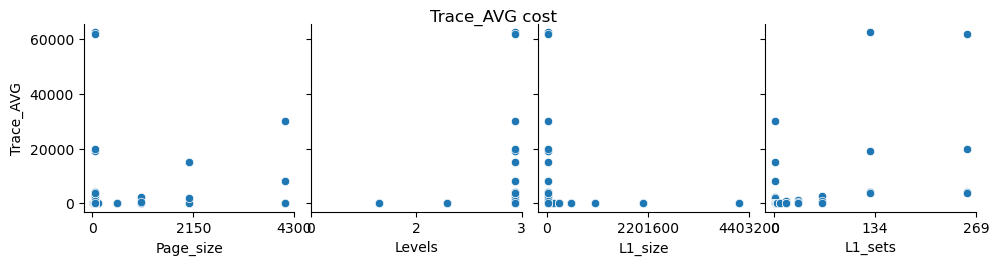

In [69]:
create_pairplots(data, filtered_columns, y1)

/Users/boss/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


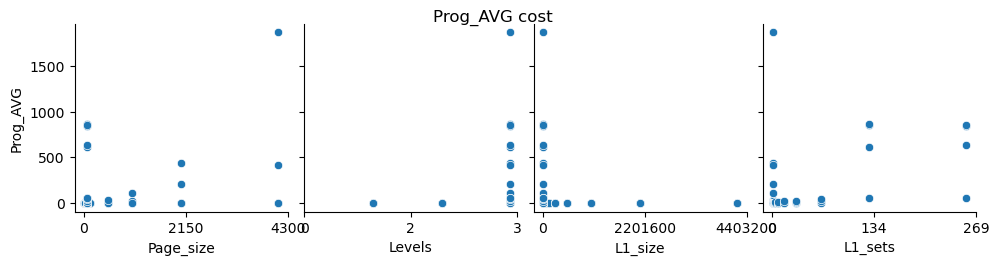

In [70]:
create_pairplots(data, filtered_columns, y2)